# Descriptive Stats of Personal CS:GO Performance
We look at my overall stats in Deathmatch (DM) and Matchmaking (MM) -- games played, win/loss ratios, k/d ratios, map performance, and performance over time.

In [50]:
# Import packages and define constants
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

#STATS_FILE = "C:\\Users\\Desktop\\stats_20181219.csv"
STATS_FILE = '../../../stats_20181219.csv'

In [52]:
# Read in file
data = pd.read_csv(STATS_FILE)
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%y')
data.drop(['Notes'], axis=1, inplace=True)
print('Num rows: ' + str(data.shape[0]) + '.  Num cols: ' + str(data.shape[1]))
data.head()

Num rows: 88.  Num cols: 10


,Date,Map,Game Type,Kills,Assists,Deaths,K-D,Full/Legit Match,Win/Loss,Num Rounds
0,2018-09-15,Inferno,DM,27,0,24,3.0,Y,NaN,NaN
1,2018-09-15,Mirage,DM,16,6,21,-5.0,Y,NaN,NaN
2,2018-09-15,Cache,DM,28,3,22,6.0,Y,NaN,NaN
3,2018-09-15,Mirage,DM,24,0,21,3.0,Y,NaN,NaN
4,2018-09-15,Cache,DM,25,1,20,5.0,Y,NaN,NaN


# Overall Summary

In [53]:
def add_rows(df, rows):
    tmp_df = pd.DataFrame(columns=df.columns, index=range(len(rows)))
    i = 0
    for row in rows:
        tmp_df.iloc[i,:] = row
        i = i + 1
    return pd.concat([df, tmp_df], axis=0, ignore_index=True)

current_date = datetime.datetime.now()
first_date = data['Date'][0]
days_since_first_game = (current_date - first_date).days
tot_dm_games = (data['Game Type'] == 'DM').sum()
tot_mm_games = (data['Game Type'] == 'MM').sum()
tot_mm_w = (data['Win/Loss'] == 'W').sum()
tot_mm_l = (data['Win/Loss'] == 'L').sum()

overall_stats = [
    ['Total Games Played', data.shape[0]],
    ['Days Since First Game Played', days_since_first_game],
    ['Avg games/day', data.shape[0] / days_since_first_game],
    ['Total DM Games', tot_dm_games],
    ['Total MM Games', tot_mm_games],
    ['Total MM Wins', tot_mm_w],
    ['Total MM Losses', tot_mm_l],
]
descriptive_df = pd.DataFrame({'Description': [], 'Value': []})[['Description', 'Value']]
descriptive_df = add_rows(descriptive_df, overall_stats)
descriptive_df.index = descriptive_df.Description
descriptive_df.drop(['Description'], axis=1, inplace=True)
display(descriptive_df)

,Value
Description,
Total Games Played,88
Days Since First Game Played,102
Avg games/day,0.862745
Total DM Games,52
Total MM Games,31
Total MM Wins,13
Total MM Losses,15


# K/D Statistics

In [54]:
kd_stats = [
    ['Total DM kills', data['Kills'][data['Game Type'] == 'DM'].sum()],
    ['Avg DM kills per game', data['Kills'][data['Game Type'] == 'DM'].sum() / tot_dm_games ],
    ['Total DM deaths', data['Deaths'][data['Game Type'] == 'DM'].sum()],
    ['Avg DM deaths per game', data['Deaths'][data['Game Type'] == 'DM'].sum() / tot_dm_games ],
    ['DM K/D Ratio', data['Kills'][data['Game Type'] == 'DM'].sum() / data['Deaths'][data['Game Type'] == 'DM'].sum()],
    ['Total MM kills', data['Kills'][data['Game Type'] == 'MM'].sum()],
    ['Avg MM kills per game', data['Kills'][data['Game Type'] == 'MM'].sum() / tot_mm_games ],
    ['Total MM deaths', data['Deaths'][data['Game Type'] == 'MM'].sum()],
    ['Avg MM deaths per game', data['Deaths'][data['Game Type'] == 'MM'].sum() / tot_mm_games ],
    ['MM K/D Ratio', data['Kills'][data['Game Type'] == 'MM'].sum() / data['Deaths'][data['Game Type'] == 'MM'].sum()],
    ['Avg MM kills per win', data['Kills'][data['Win/Loss'] == 'W'].sum() / tot_mm_w],
    ['Avg MM kills per loss', data['Kills'][data['Win/Loss'] == 'L'].sum() / tot_mm_l],
    ['Avg MM deaths per win', data['Deaths'][data['Win/Loss'] == 'W'].sum() / tot_mm_w],
    ['Avg MM deaths per loss', data['Deaths'][data['Win/Loss'] == 'L'].sum() / tot_mm_l],
    ['Avg K/D per win', data['Kills'][data['Win/Loss'] == 'W'].sum() / data['Deaths'][data['Win/Loss'] == 'W'].sum()],
    ['Avg K/D per loss', data['Kills'][data['Win/Loss'] == 'L'].sum() / data['Deaths'][data['Win/Loss'] == 'L'].sum()]
]
kd_df = pd.DataFrame({'Description': [], 'Value': []})[['Description', 'Value']]
kd_df = add_rows(kd_df, kd_stats)
kd_df.index = kd_df.Description
kd_df.drop(['Description'], axis=1, inplace=True)
display(kd_df)

,Value
Description,
Total DM kills,1256
Avg DM kills per game,24.1538
Total DM deaths,891
Avg DM deaths per game,17.1346
DM K/D Ratio,1.40965
Total MM kills,415
Avg MM kills per game,13.3871
Total MM deaths,527
Avg MM deaths per game,17


# Stats over time

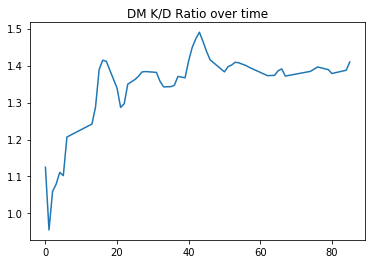

In [55]:
data['kd_ratio'] = data['Kills'] / data['Deaths']
dm_cum_kd_ratio = np.cumsum(data['Kills'][data['Game Type'] == 'DM']) / np.cumsum(data['Deaths'][data['Game Type'] == 'DM'])
plt.plot(data[data['Game Type'] == 'DM'].index, dm_cum_kd_ratio)
plt.title('DM K/D Ratio over time')
plt.show()

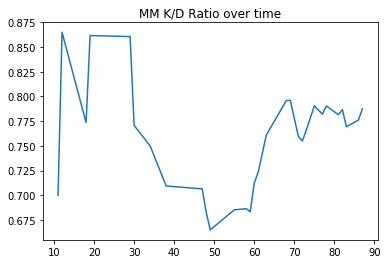

In [56]:
mm_cum_kd_ratio = np.cumsum(data['Kills'][data['Game Type'] == 'MM']) / np.cumsum(data['Deaths'][data['Game Type'] == 'MM'])
plt.plot(data[data['Game Type'] == 'MM'].index, mm_cum_kd_ratio)
plt.title('MM K/D Ratio over time')
plt.show()

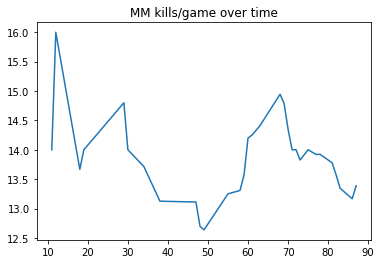

In [57]:
mm_cum_kills_per_game = np.cumsum(data['Kills'][data['Game Type'] == 'MM']) / np.cumsum(np.ones((data['Game Type'] == 'MM').sum()))
plt.plot(data[data['Game Type'] == 'MM'].index, mm_cum_kills_per_game)
plt.title('MM kills/game over time')
plt.show()

# Map Based Performance

In [58]:
data['ones'] = 1
data['win_loss'] = data['Win/Loss'].map({'W': True, 'L': False})
mm_map_based = data[['Map', 'Kills', 'Assists', 'Deaths', 'win_loss', 'ones']][data['Game Type'] == 'MM'].groupby(['Map']).sum()
dm_map_based = data[['Map', 'Kills', 'Assists', 'Deaths', 'ones']][data['Game Type'] == 'DM'].groupby(['Map']).sum()
mm_map_based.rename({'ones': 'games_played'}, axis=1, inplace=True)
mm_map_based['kd_ratio'] = mm_map_based['Kills'] / mm_map_based['Deaths']
mm_map_based.sort_values(by='games_played', inplace=True, ascending=False)
mm_map_based['kills_per_game'] = mm_map_based['Kills'] / mm_map_based['games_played']
dm_map_based.rename({'ones': 'games_played'}, axis=1, inplace=True)
dm_map_based['kd_ratio'] = dm_map_based['Kills'] / dm_map_based['Deaths']
dm_map_based.sort_values(by='games_played', inplace=True, ascending=False)
dm_map_based['kills_per_game'] = dm_map_based['Kills'] / dm_map_based['games_played']

In [59]:
mm_map_based

,Kills,Assists,Deaths,games_played,kd_ratio,kills_per_game
Map,,,,,,
Dust2,90,24,140,8,0.642857,11.250000
Cache,66,10,89,5,0.741573,13.200000
Mirage,71,11,85,5,0.835294,14.200000
Nuke,83,13,85,5,0.976471,16.600000
Inferno,50,13,54,4,0.925926,12.500000
Train,37,9,53,3,0.698113,12.333333
Overpass,18,2,21,1,0.857143,18.000000


In [60]:
dm_map_based

,Kills,Assists,Deaths,games_played,kd_ratio,kills_per_game
Map,,,,,,
Mirage,301,41,278,14,1.082734,21.500000
Cache,234,28,169,9,1.384615,26.000000
Inferno,222,20,171,9,1.298246,24.666667
Nuke,120,6,58,5,2.068966,24.000000
Overpass,87,8,61,4,1.426230,21.750000
Dust2,89,4,37,3,2.405405,29.666667
Train,70,5,43,3,1.627907,23.333333
Austria,62,6,32,2,1.937500,31.000000
Biome,25,1,16,1,1.562500,25.000000
